<a href="https://colab.research.google.com/github/hanabi70/ML_FORMATION/blob/main/Copie_de_TP_de_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Prédiction du Churn avec du machine learning

## Objectif du TP

L'objectif de ce TP est de créer une API de prédiction du churn (attrition) qui utilise des algorithmes de machine learning. L'API permettra de recevoir des données clients sous forme de requêtes HTTP et, grâce au modèle de machine learning, retourne une prédiction, si un client est susceptible de se désabonner ou non. L'API sera développée en utilisant le framework `Flask` et permettra d'exposer facilement le modèle via un endpoint accessible localement dans un premier temps.Dans un second temps, l'APi sera empaquetée dans un environnement `Docker` et déployée sur un cloud.

Ce TP couvrira plusieurs étapes clés : la préparation et l'entraînement du modèle de machine learning, la création et la sérialisation du modèle, la conception de l'API Flask, ainsi que son déploiement dans un conteneur Docker. Les participants auront également l'occasion de tester l'API en envoyant des requêtes avec des outils tels que Postman ou curl, tout en explorant des concepts liés à la conteneurisation avec Docker, facilitant ainsi l'intégration continue et la scalabilité des solutions d'IA


## Partie I

### Étape 1 : Préparation des données et entraînement du modèle de prédiction (ML)

1. **Analyse exploratoire des données (EDA)** : Explorer le dataset fourni, comprendre les caractéristiques des clients et des churns. Utiliser des bibliothèques comme `pandas` et `matplotlib` pour visualiser les données et identifier les tendances.
   

2. **Prétraitement des données** :
   Divisez les données en un ensemble d'entraînement et de test.

3. **Entraînement d'un modèle de machine learning** :
   Utilisez `statsmodels` pour entraîner un modèle de régression logistique. Interpréter le modèle et sélectionner les variables les plus pertinentes. Mesurer les performances sur le test.

3. ** Préparation du modèle** :
   Entraîner le modèle avec les variables sélectionnées avec `sklearn`.

4. **Sérialisation du modèle** :
   Une fois le modèle entraîné, sauvegardez-le sous format`pickle` à l'aide de `joblib` pour pouvoir le charger plus tard dans l'API Flask.


### Étape 2 : Création de l'API Flask

1. **Création de l'API** :
   A l'aide de **Flask**, exposer le modèle en déployant, en local, une API qui recevra les données des clients en entrée et renverra une prédiction (churn ou non churn).


2. **Endpoints de l'API** :
   L'API doit avoir un endpoint `POST /predict` qui acceptera les caractéristiques d'un client sous forme de **JSON** et retournera une prédiction (churn ou non churn).


3. **Chargement du modèle dans l'API** :
   Le modèle pré-entraîné sera chargé avec `pickle` et utilisé pour générer des prédictions lors des appels à l'API.


### Étape 3 : Test de l'API Flask

1. **Test de l'API** :
   A l'aide de **request**, tester l'API en local envoyant des requêtes via le endpoint `POST /predict`.
   


2. **Optionnel** :
   Créer une interface `HTML` pour interagit avec l'API d'une manière plus simple et plus intuitive.
---



## Import Dependance

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score

In [2]:
!wget -O customer_churn.csv https://raw.githubusercontent.com/RMoulla/MLW_Mars/main/customer_churn.csv

--2025-03-19 13:49:08--  https://raw.githubusercontent.com/RMoulla/MLW_Mars/main/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115479 (113K) [text/plain]
Saving to: ‘customer_churn.csv’

customer_churn.csv  100%[===================>] 112.77K  --.-KB/s    in 0.02s   

2025-03-19 13:49:09 (6.33 MB/s) - ‘customer_churn.csv’ saved [115479/115479]



## Data Formatting

In [100]:
df = pd.read_csv('customer_churn.csv')
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [55]:
df["Age"] = df["Age"].astype(int)
df["Account_Manager"] = df["Account_Manager"].astype(bool)
df["Years"] = df["Years"].astype(float)
df["Num_Sites"] = df["Num_Sites"].astype(int)
df["Churn"] = df["Churn"].astype(bool)
df["Account_Manager"] = df['Account_Manager'].astype(bool)

## EDA

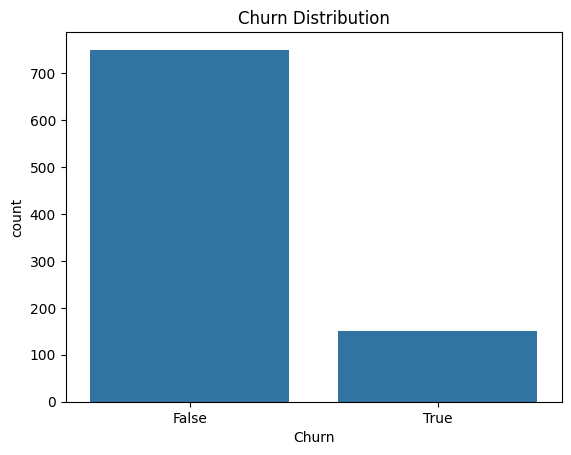

In [59]:
churns = df["Churn"].value_counts().reset_index()
sns.barplot(x="Churn", y="count", data=churns)
plt.title("Churn Distribution")
plt.show()

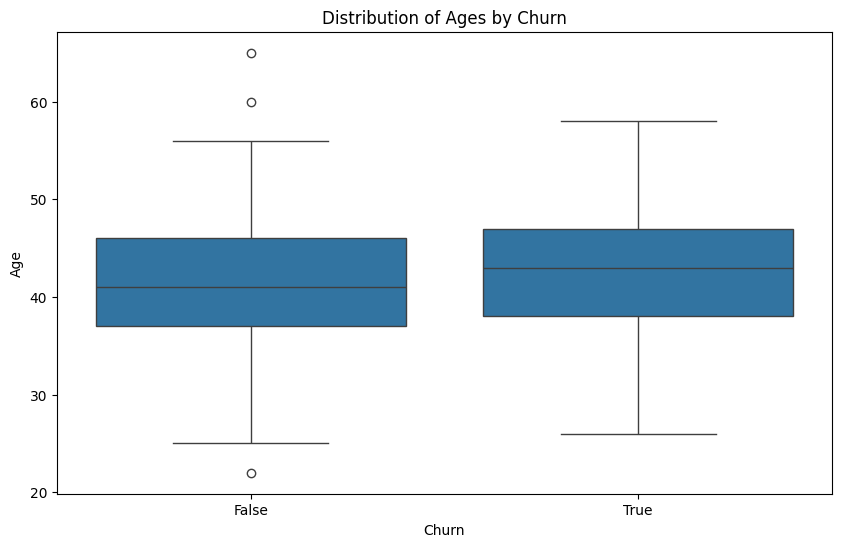

In [26]:
# Assuming your dataframe is named 'df' and has columns 'Age' and 'Churn'

# Create the distribution plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=df, x='Churn', y = "Age")

# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Distribution of Ages by Churn')

# Display the plot
plt.show()

<Figure size 2000x600 with 0 Axes>

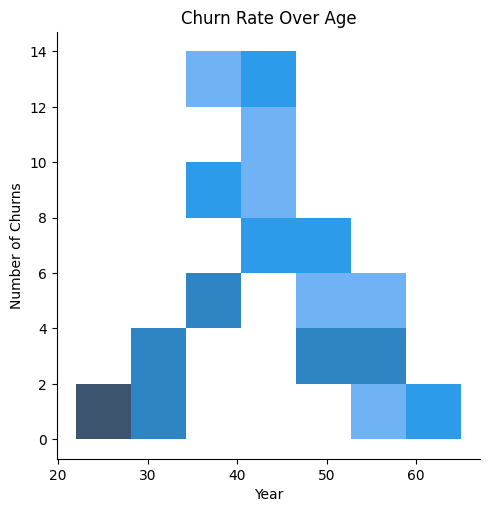

In [72]:

# Group by year and sum the churns
churn_by_age = df.groupby('Age')['Churn'].sum().reset_index()

# Create the plot using Seaborn
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
sns.displot(x='Age', y='Churn', data=churn_by_age)
plt.xlabel("Year")
plt.ylabel("Number of Churns")
plt.title("Churn Rate Over Age")
plt.show()

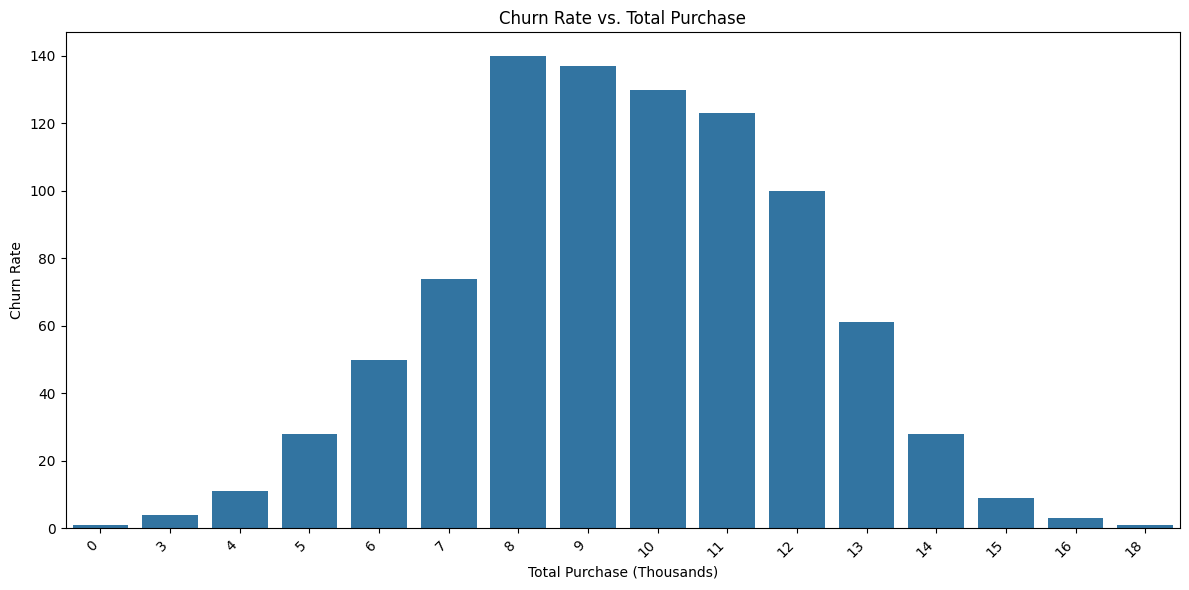

In [29]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and has columns 'TotalCharges' and 'Churn'

# Create a new column for total purchase in thousands
df['TotalPurchaseThousands'] = pd.cut(df['Total_Purchase'], bins=np.arange(0, df['Total_Purchase'].max() + 1000, 1000), labels=False, include_lowest=True)

# Group by total purchase in thousands and calculate churn rate
churn_by_purchase = df.groupby('TotalPurchaseThousands')['Churn'].count().reset_index()

# Create the plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='TotalPurchaseThousands', y='Churn', data=churn_by_purchase)
plt.xlabel("Total Purchase (Thousands)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate vs. Total Purchase")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

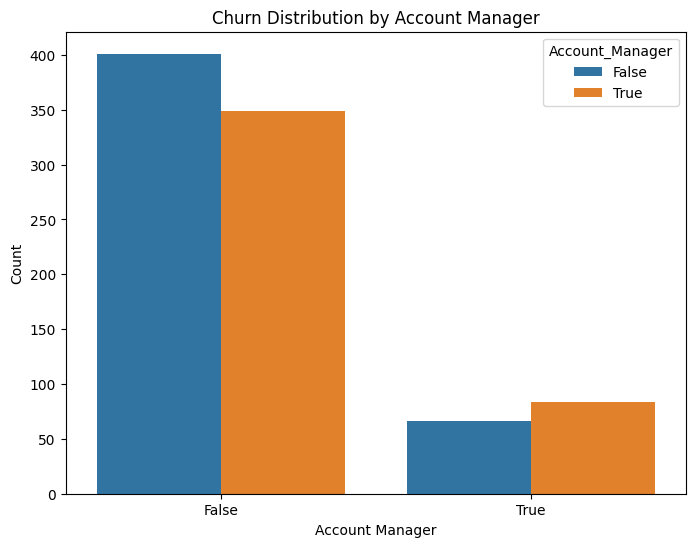

In [47]:
churn_by_account_manager = df[["Account_Manager","Churn"]].value_counts().reset_index()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.barplot(x='Churn', y='count', hue='Account_Manager', data=churn_by_account_manager)
plt.xlabel("Account Manager")
plt.ylabel("Count")
plt.title("Churn Distribution by Account Manager")
plt.show()

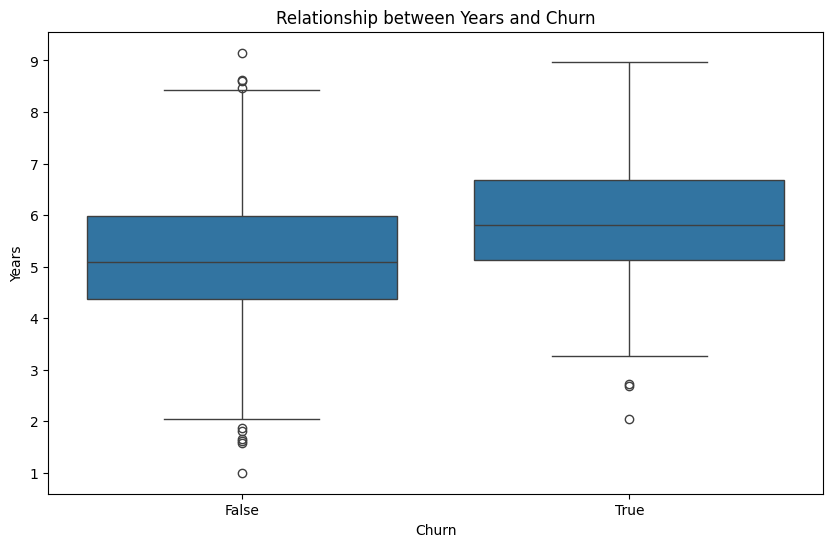

In [49]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='Churn', y='Years', data=df)
plt.xlabel('Churn')
plt.ylabel('Years')
plt.title('Relationship between Years and Churn')
plt.show()

### STATS EDA

In [199]:
vars = ['Age','Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn']
x_vars = ["Age","Years","Num_Sites","Account_Manager"]
y_vars = ["Churn"]
df_stats = df[vars]

In [200]:
y = df_stats[['Churn']]
X = df_stats[x_vars]


In [204]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, stratify=df_stats["Churn"],random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5,stratify = y_rest["Churn"],random_state=42)

In [205]:
X_train = sm.add_constant(X_train)
X_valid = sm.add_constant(X_valid)
X_test = sm.add_constant(X_test)

In [206]:
log_reg = sm.Logit(y_train, X_train).fit()    # Describe model
print(log_reg.summary())   # Summarize model



Optimization terminated successfully.
         Current function value: 0.272873
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  630
Model:                          Logit   Df Residuals:                      625
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.3944
Time:                        16:03:41   Log-Likelihood:                -171.91
converged:                       True   LL-Null:                       -283.85
Covariance Type:            nonrobust   LLR p-value:                 2.731e-47
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.8137      1.797     -9.914      0.000     -21.335     -14.292
Age           

In [213]:
# performing predictions on the test dataset
yhat = log_reg.predict(X_valid)
thresh = 0.5
prediction = [0 if hat<thresh else 1 for hat in yhat]

# comparing original and predicted values of y
print('Actual values', [int(x[0]) for x in y_valid.values])
print('Predictions :', prediction)

Actual values [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Predictions : [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [214]:

# confusion matrix
cm = confusion_matrix(y_valid, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Precision score=', precision_score(y_valid, prediction))
print('Recall score=', recall_score(y_valid, prediction))
print('F1 score=', f1_score(y_valid, prediction))

Confusion Matrix : 
 [[101  11]
 [  4  19]]
Precision score= 0.6333333333333333
Recall score= 0.8260869565217391
F1 score= 0.7169811320754716


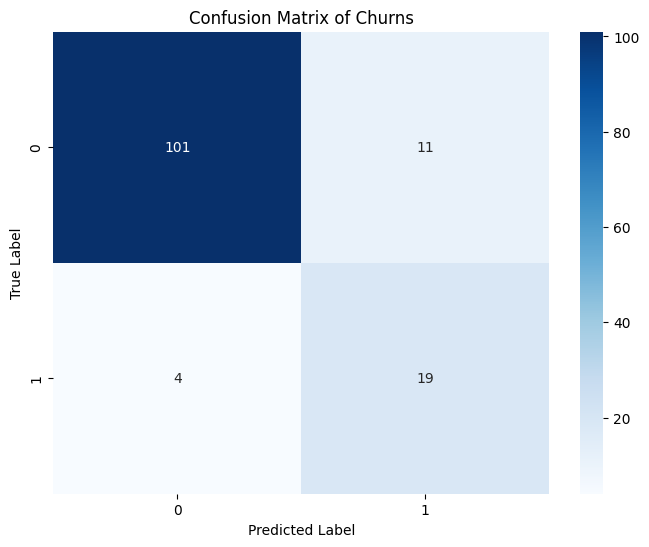

In [215]:
# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Churns")
plt.show()

In [219]:
y_probs = np.arange(0.1,0.9,0.1)
roc_auc_score(y_valid,prediction)

np.float64(0.8639363354037267)